In [ ]:
# Social_Network_Ads.csv

In [39]:
!ls

sample_data  Social_Network_Ads.csv


This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [40]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [41]:
df = pd.read_csv("Social_Network_Ads.csv")

In [42]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
df.shape

(400, 5)

In [44]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

**Splitting the dataset into the Training set and Test set**

In [46]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]
X.shape, y.shape

((400, 2), (400,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape

((300, 2), (100, 2))

**Feature Scaling**

In [48]:
# Age, EstimatedSalay have very diverese range of data
# So, I will feature scale them to lie between similar range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[["Age", "EstimatedSalary"]] = scaler.fit_transform(X_train[["Age", "EstimatedSalary"]])
X_test[["Age", "EstimatedSalary"]]  = scaler.transform(X_test[["Age", "EstimatedSalary"]])

In [49]:
X_train.head()

,Age,EstimatedSalary
247,1.892589,1.521894
110,0.125038,0.032132
16,0.910616,-1.311575
66,-1.347922,-1.486841
153,-0.169554,-0.581299


**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

**Step 3 | Predection**

In [51]:
y_pred = model.predict(X_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [63]:
# Before creating the Confusion Matrix, I will calculate the accuracy score
from sklearn.metrics import accuracy_score
print('Logistic Regression Accuracy is:', accuracy_score(y_test,y_pred))

Logistic Regression Accuracy is: 0.86


**Making the Confusion Matrix**

In [53]:
# Using Crosstab method
pd.crosstab(y_pred, y_test,  rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predicted,,,
0,61,12,73
1,2,25,27
All,63,37,100


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[61, 12],
       [ 2, 25]])

**Visualization**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

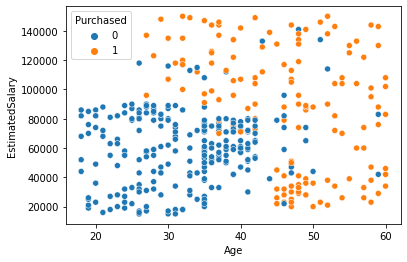

In [56]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df);

In [57]:
X.head(1)

,Age,EstimatedSalary
0,19,19000


In [58]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


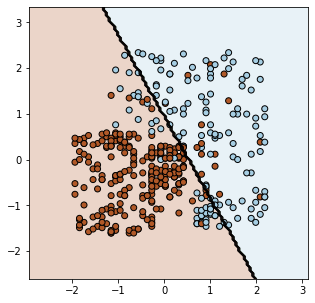

In [61]:
# We are plotting decision boundary for the whole dataset
# So, we have to scale the dataset accordingly
X_scaled  = scaler.transform(X[["Age", "EstimatedSalary"]]) #It creates a numpy array
plot_decision_boundary(model, X_scaled, y.values) #Needs to pass np array